# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju

- Nama: Muhammad Reza Ubaidillah
- Email: muhammadrezaubaidillah15@gmail.com
- Id Dicoding: rezaubaidillah

#  Business Understanding

* Mengidentifikasi faktor utama yang memengaruhi tingginya attrition rate di Jaya Jaya Maju.

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Menyiapkan data yang akan diguankan

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HR/employee_data.csv")

In [4]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeId** - Employee Identifier
* **Attrition** - Did the employee attrition? (0=no, 1=yes)
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Daily salary
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Hourly salary
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly salary
* **MonthlyRate** - Mounthly rate
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager


## Data Cleaning

In [6]:
duplicate_count = df.duplicated().sum()
print("Jumlah duplikasi: ", duplicate_count)

Jumlah duplikasi:  0


### Penghapusan Nilai Nan pada Kolom Attrition

In [7]:
df['Attrition'].isna().sum()

np.int64(412)

In [8]:
df_cleaned = df.dropna(subset=['Attrition'])

In [9]:
print("\nJumlah nilai kosong pada kolom Attrition setelah pembersihan:")
print(df_cleaned['Attrition'].isna().sum())


Jumlah nilai kosong pada kolom Attrition setelah pembersihan:
0


## EDA

In [10]:
print("Distribusi Attrition:")
print(df_cleaned['Attrition'].value_counts(normalize=True) * 100)

Distribusi Attrition:
Attrition
0.0    83.081285
1.0    16.918715
Name: proportion, dtype: float64


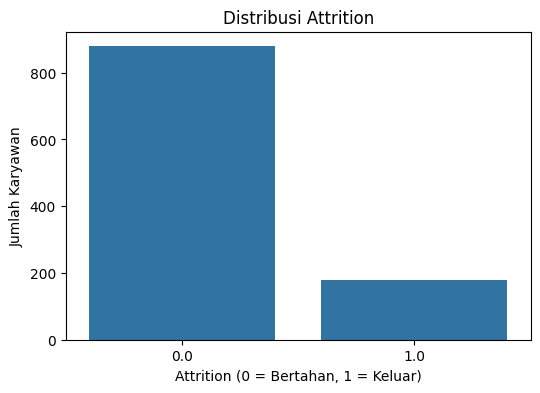

In [11]:
# Visualisasi distribusi Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df_cleaned)
plt.title('Distribusi Attrition')
plt.xlabel('Attrition (0 = Bertahan, 1 = Keluar)')
plt.ylabel('Jumlah Karyawan')
plt.show()

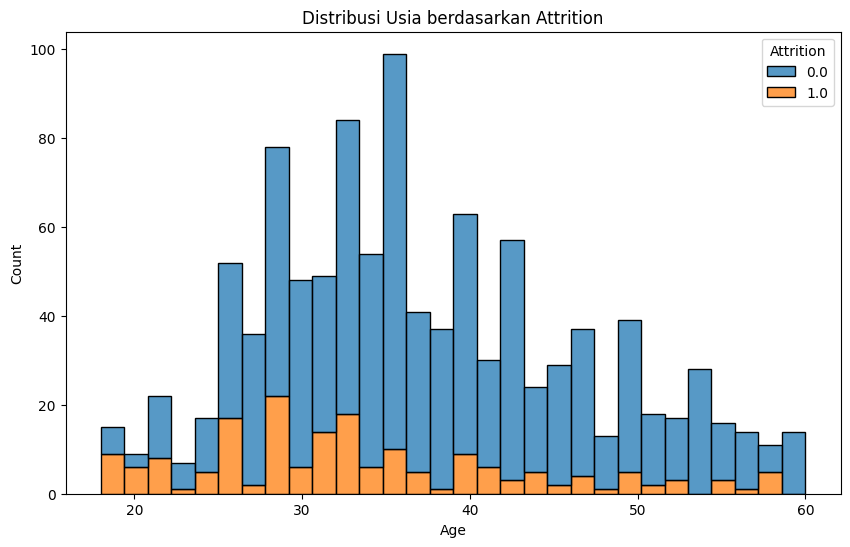

In [12]:
# Visualisasi distribusi usia berdasarkan Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Age', hue='Attrition', multiple='stack', bins=30)
plt.title('Distribusi Usia berdasarkan Attrition')
plt.show()

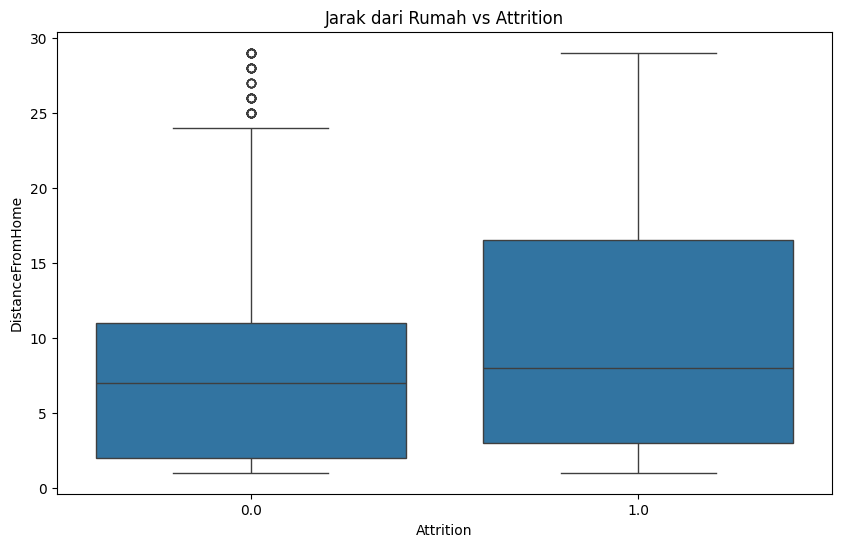

In [13]:
# Visualisasi hubungan antara DistanceFromHome dan Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df_cleaned)
plt.title('Jarak dari Rumah vs Attrition')
plt.show()

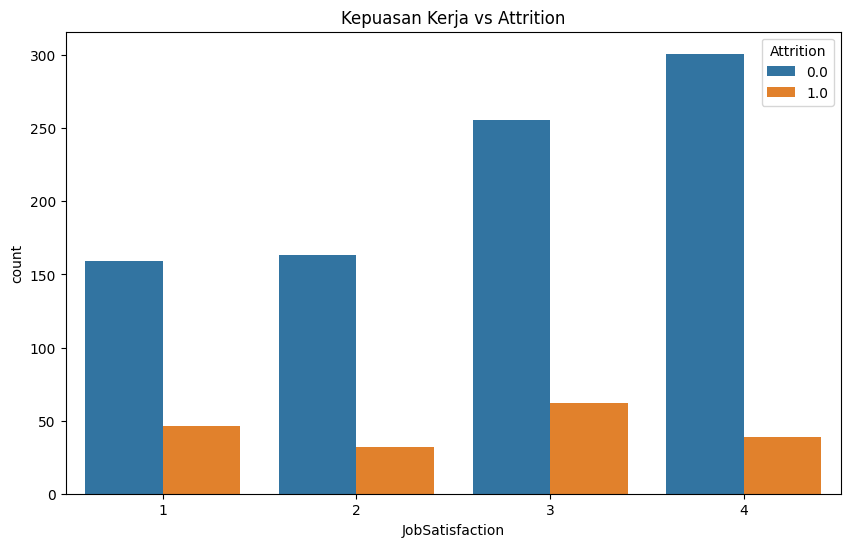

In [14]:
# Visualisasi hubungan antara JobSatisfaction dan Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df_cleaned)
plt.title('Kepuasan Kerja vs Attrition')
plt.show()

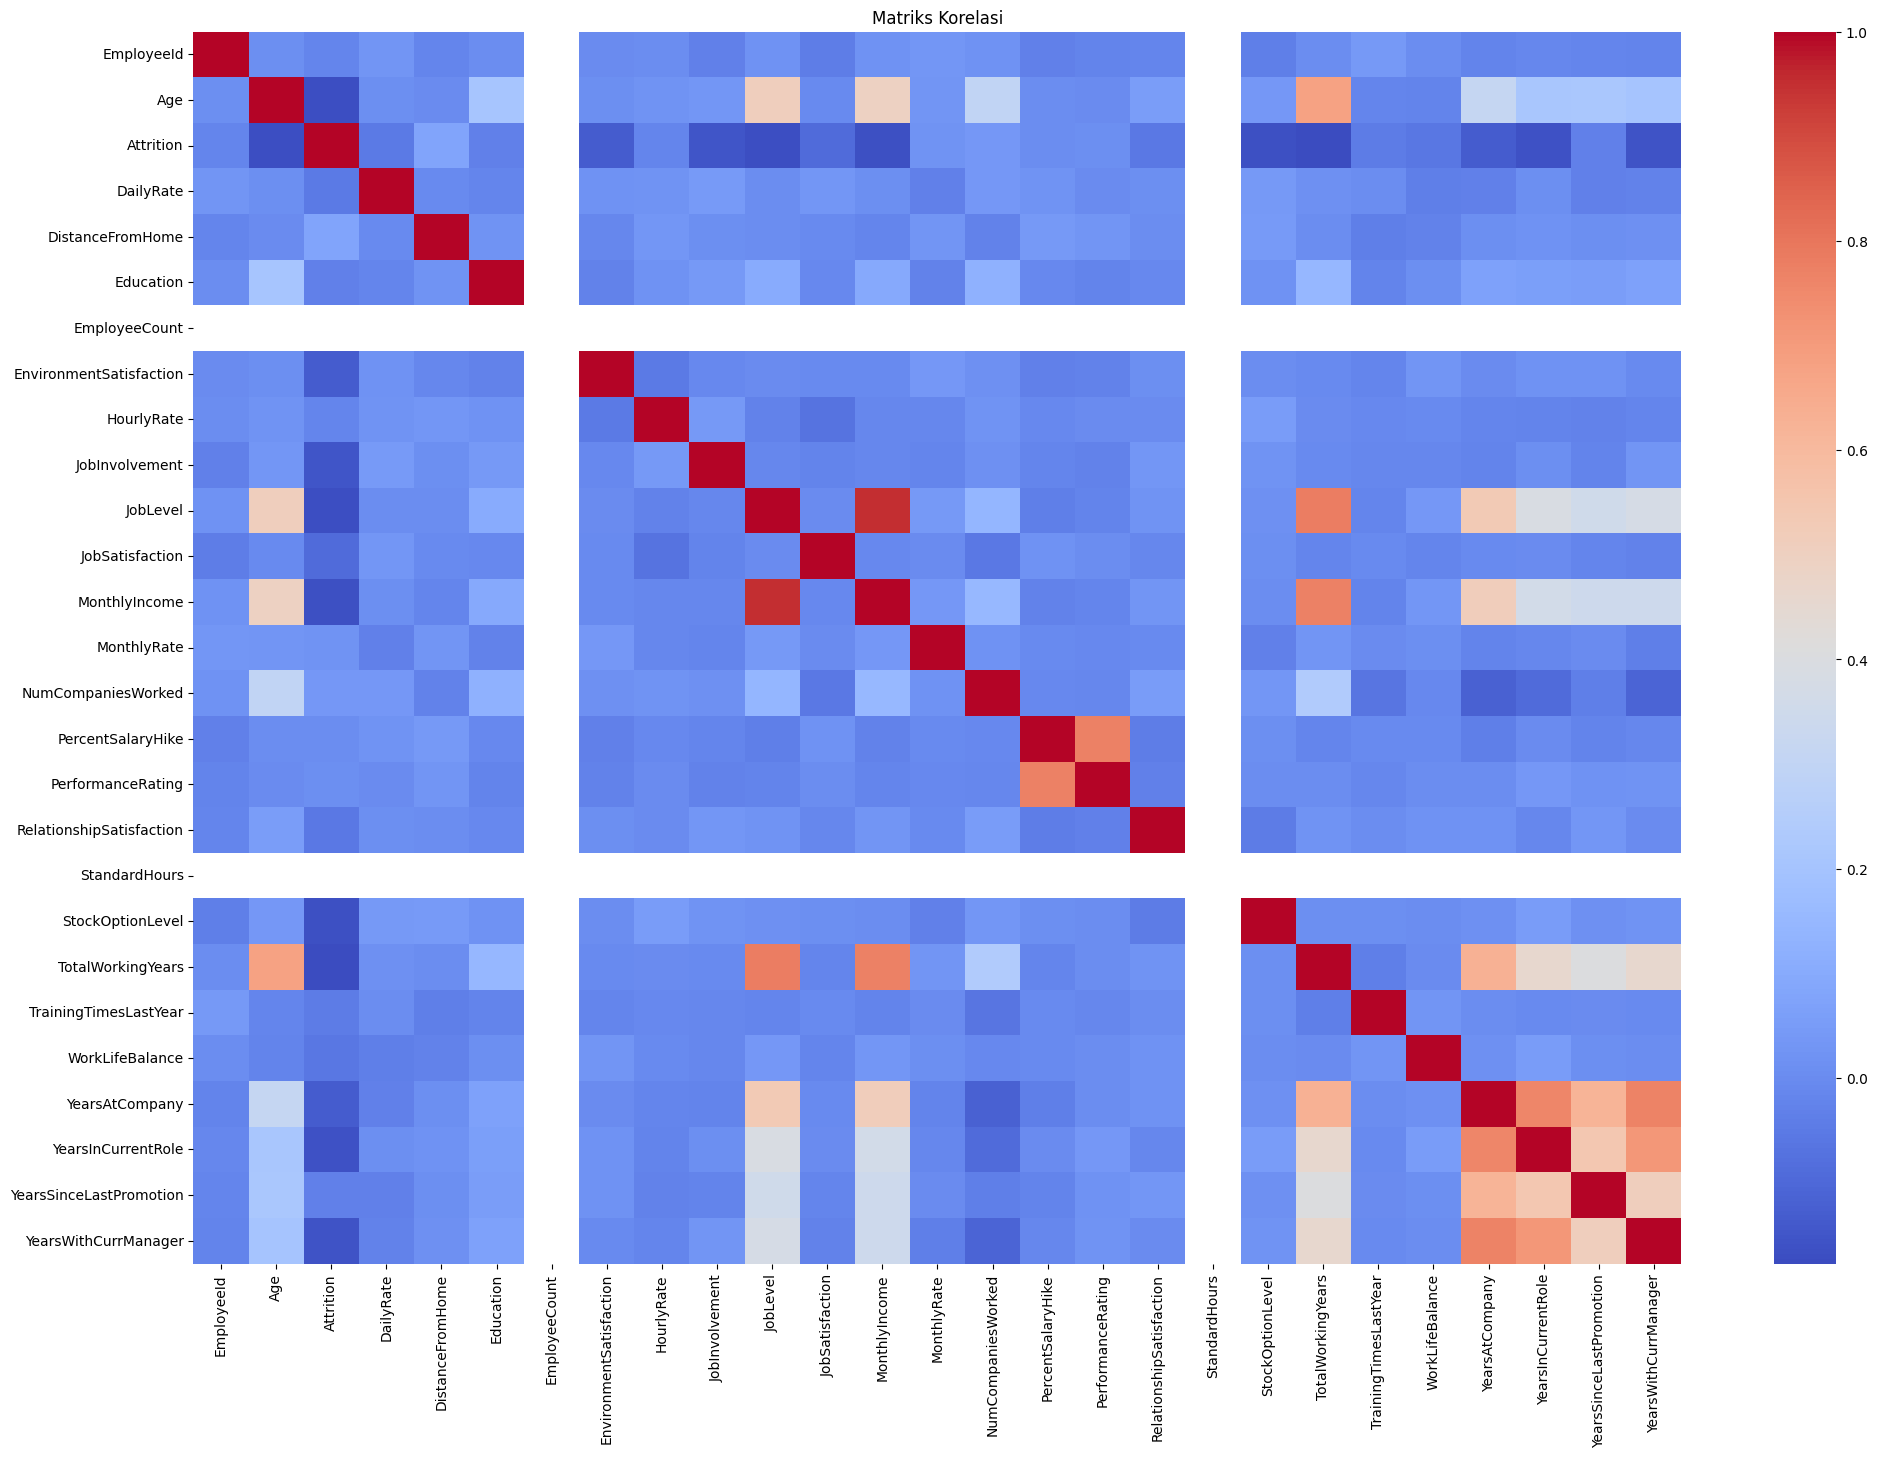

In [15]:
# Korelasi antar variabel numerik
plt.figure(figsize=(24, 16))
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

## Data Preparation / Preprocessing

In [16]:
# Mengencode variabel kategorikal
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

<ipython-input-16-c1839f81a6e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
<ipython-input-16-c1839f81a6e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
<ipython-input-16-c1839f81a6e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [17]:
# Memisahkan fitur dan target
X = df_cleaned.drop(['Attrition', 'EmployeeId', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1)  # Kolom tidak relevan dihapus
y = df_cleaned['Attrition']

In [18]:
# Periksa multicollinearity dengan VIF
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF untuk Fitur:")
print(vif[vif['VIF'] > 10])  # Fitur dengan VIF > 10 mungkin berkorelasi tinggi


VIF untuk Fitur:
              Feature         VIF
0                 Age   32.714948
3          Department   13.246951
9          HourlyRate   11.202156
10     JobInvolvement   15.950251
11           JobLevel   56.034068
15      MonthlyIncome   34.590362
19  PercentSalaryHike   42.605382
20  PerformanceRating  123.441612
23  TotalWorkingYears   15.106716
25    WorkLifeBalance   15.572771
26     YearsAtCompany   10.441345


In [19]:
# Normalisasi fitur numerik
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:

# Terapkan Borderline-SMOTE untuk oversampling
print("\nDistribusi kelas sebelum SMOTE:")
print(y_train.value_counts())

smote = BorderlineSMOTE(random_state=42, k_neighbors=3)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nDistribusi kelas setelah Borderline-SMOTE:")
print(pd.Series(y_train_res).value_counts())


Distribusi kelas sebelum SMOTE:
Attrition
0.0    706
1.0    140
Name: count, dtype: int64

Distribusi kelas setelah Borderline-SMOTE:
Attrition
0.0    706
1.0    706
Name: count, dtype: int64


## Modeling

In [22]:
# Optimasi Logistic Regression
# Parameter grid untuk Logistic Regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced', None]
}

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_grid_search = GridSearchCV(
    estimator=lr_model,
    param_grid=lr_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
# Melatih Logistic Regression
lr_grid_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1', verbose=1)

## Evaluation

In [23]:
# Evaluasi Logistic Regression
print("\n=== Logistic Regression ===")
print("Parameter Terbaik:", lr_grid_search.best_params_)
print("Skor F1 Terbaik (Cross-Validation):", lr_grid_search.best_score_)

lr_best = lr_grid_search.best_estimator_
y_pred_lr = lr_best.predict(X_test)

print("\nEvaluasi Logistic Regression pada Data Pengujian:")
print("Akurasi:", accuracy_score(y_test, y_pred_lr))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, lr_best.predict_proba(X_test)[:, 1]))




=== Logistic Regression ===
Parameter Terbaik: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Skor F1 Terbaik (Cross-Validation): 0.856396044803431

Evaluasi Logistic Regression pada Data Pengujian:
Akurasi: 0.8301886792452831
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.92      0.87      0.89       173
         1.0       0.53      0.67      0.59        39

    accuracy                           0.83       212
   macro avg       0.73      0.77      0.74       212
weighted avg       0.85      0.83      0.84       212

AUC-ROC: 0.8360752927226917


In [24]:
# Cross-validation untuk memeriksa overfitting
lr_cv_scores = cross_val_score(lr_best, X_train_res, y_train_res, cv=5, scoring='f1')
print("Rata-rata F1-Score (Cross-Validation):", lr_cv_scores.mean())
print("Standar Deviasi F1-Score:", lr_cv_scores.std())

# Sesuaikan threshold untuk meningkatkan precision
y_pred_proba_lr = lr_best.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_lr)
optimal_idx = np.argmax(precision * recall)  # Maksimalkan precision * recall
optimal_threshold = thresholds[optimal_idx]
y_pred_lr_adjusted = (y_pred_proba_lr >= optimal_threshold).astype(int)

print("\nEvaluasi Logistic Regression dengan Threshold Optimal (", optimal_threshold, "):")
print("Akurasi:", accuracy_score(y_test, y_pred_lr_adjusted))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_lr_adjusted))

Rata-rata F1-Score (Cross-Validation): 0.856396044803431
Standar Deviasi F1-Score: 0.03911048955759288

Evaluasi Logistic Regression dengan Threshold Optimal ( 0.864237747298763 ):
Akurasi: 0.8962264150943396
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       173
         1.0       0.87      0.51      0.65        39

    accuracy                           0.90       212
   macro avg       0.88      0.75      0.79       212
weighted avg       0.89      0.90      0.89       212



In [25]:
# oefisien/Fitur Penting
# Logistic Regression
feature_names = df.drop(['Attrition', 'EmployeeId', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1).columns
lr_coef = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_best.coef_[0]})
lr_coef = lr_coef.sort_values(by='Coefficient', ascending=False)
print("\nKoefisien Logistic Regression:")
print(lr_coef)




Koefisien Logistic Regression:
                     Feature  Coefficient
18                  OverTime     1.265514
28   YearsSinceLastPromotion     0.554610
26            YearsAtCompany     0.522816
14             MaritalStatus     0.484683
17        NumCompaniesWorked     0.467271
3                 Department     0.437042
6             EducationField     0.425176
4           DistanceFromHome     0.408370
8                     Gender     0.289503
16               MonthlyRate     0.284604
5                  Education     0.225982
9                 HourlyRate    -0.047039
15             MonthlyIncome    -0.075638
20         PerformanceRating    -0.080367
19         PercentSalaryHike    -0.106690
2                  DailyRate    -0.109423
12                   JobRole    -0.170210
1             BusinessTravel    -0.175929
24     TrainingTimesLastYear    -0.200018
25           WorkLifeBalance    -0.309073
21  RelationshipSatisfaction    -0.383135
10            JobInvolvement    -0.400213
0 

In [26]:
# Menyimpan ke file CSV
lr_coef.to_csv('logistic_regression_coefficients.csv', index=False)
print("\nKoefisien telah disimpan ke 'logistic_regression_coefficients.csv'")


Koefisien telah disimpan ke 'logistic_regression_coefficients.csv'
